In [3]:
import tensorflow as tf
import PIL
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback
from functools import partial
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications import VGG16

AttributeError: module 'numpy' has no attribute 'integer'

In [2]:
import os
import PIL
import numpy as np
import pandas as pd

# Define paths to image folders
img_dir = "Landmarks-v1_1/"

d = {"image_name":[],"image_pixels":[], "category":[],"landmark":[]}

cnt = 0
for category in os.scandir(img_dir):
    if os.path.isdir(category):
        for landmark in os.scandir(category):
            if os.path.isdir(landmark):
                for img in os.scandir(landmark):
                    cnt+=1
                    try:
                        img_path = os.path.abspath(img)
                        img_data = PIL.Image.open(img_path)
                        img_data = img_data.resize((224,224))
                        
                        if img_data.mode != 'RGB':
                            print("Converting from Grayscale to RGB:",img_path,"\n")
                            img_data = img_data.convert('RGB')
    
                        d["image_pixels"].append(np.array(img_data))
                        d["image_name"].append(img_path[img_path.rfind('/')+1:])
                        d["category"].append(category.name)
                        d["landmark"].append(landmark.name)
                    except:
                        print("Error Reading:",img_path,"\n")
                        continue

df = pd.DataFrame(d)

C:\Users\HIMANSHUU\anaconda3\lib\site-packages\PIL\Image.py:2942: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_1\Mughal\Bibi Ka Maqbara\Bibi Ka Maqbara - 10.jpg 

Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_1\Mughal\Bibi Ka Maqbara\Bibi Ka Maqbara - 14.jpg 

Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_1\Mughal\Bibi Ka Maqbara\Bibi Ka Maqbara - 15.jpg 

Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_1\Mughal\Jama Masjid\Jama Masjid - 19.jpg 

Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_1\Mughal\Jama Masjid\Jama Masjid - 2.jpg 

Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_1\Mughal\Taj Mahal\Taj Mahal - 1.jpg 

Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_1\Mughal\Taj Mahal\Taj Mahal - 11.jpg 

Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_1\Mughal\Taj Mahal\Taj Mahal - 18.jpg 

Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_1\Mughal\Taj Mahal\Taj Mahal - 4.jpg 

Error Reading: C:\Users\HIMANSHUU\Desktop\kt552\La

In [3]:
import PIL

In [3]:
df

,image_name,image_pixels,category,landmark
0,C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_...,"[[[154, 199, 250], [153, 200, 252], [155, 200,...",Gothic,ChartresCathedral
1,C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_...,"[[[139, 167, 170], [104, 115, 125], [153, 173,...",Gothic,ChartresCathedral
2,C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_...,"[[[4, 6, 5], [5, 7, 6], [6, 8, 7], [6, 8, 7], ...",Gothic,ChartresCathedral
3,C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_...,"[[[1, 113, 217], [1, 116, 219], [0, 116, 219],...",Gothic,ChartresCathedral
4,C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_...,"[[[197, 209, 223], [199, 211, 225], [198, 209,...",Gothic,ChartresCathedral
...,...,...,...,...
393,C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_...,"[[[93, 148, 212], [93, 147, 210], [92, 148, 20...",Pyramids,Santa Cecilia Acatitlan Pyramid
394,C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_...,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",Pyramids,Santa Cecilia Acatitlan Pyramid
395,C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_...,"[[[59, 56, 53], [87, 86, 86], [63, 63, 67], [1...",Pyramids,Santa Cecilia Acatitlan Pyramid
396,C:\Users\HIMANSHUU\Desktop\kt552\Landmarks-v1_...,"[[[237, 237, 237], [237, 237, 237], [236, 236,...",Pyramids,Santa Cecilia Acatitlan Pyramid


In [4]:
!pip uninstall pillow

^C


In [4]:
df = pd.DataFrame(d)

le_category = LabelEncoder()
le_category.fit(df["category"])
print("Categories:",[(int(np.where(le_category.classes_==c)[0]),c) for c in le_category.classes_])
print()
df["category"] = le_category.transform(df["category"])

le_landmark = LabelEncoder()
le_landmark.fit(df["landmark"])
df["landmark"] = le_landmark.transform(df["landmark"])
print("Landmarks:",[(int(np.where(le_landmark.classes_==c)[0]),c) for c in le_landmark.classes_])

df.head()

Categories: [(0, 'Gothic'), (1, 'Modern'), (2, 'Mughal'), (3, 'Neoclassical'), (4, 'Pagodas'), (5, 'Pyramids')]

Landmarks: [(0, 'Academy of Athens'), (1, 'Bibi Ka Maqbara'), (2, 'Buckingham Palace'), (3, 'CCTV Headquarters'), (4, 'Cathedral of Brasília'), (5, 'ChartresCathedral'), (6, 'Chrysler Building'), (7, 'CologneCathedral'), (8, 'Concertgebouw'), (9, 'El Castillo, Chichen Itza'), (10, 'FogongTemplePagoda'), (11, 'GiantWildGoosePagoda'), (12, 'Hallgrímskirkja'), (13, 'Jama Masjid'), (14, 'Louvre Pyramid'), (15, 'MilanCathedral'), (16, 'Notre-DameCathedral'), (17, 'Panthéon'), (18, 'Pyramid of Djoser'), (19, 'Pyramid of Giza'), (20, 'Ripon Building'), (21, 'Santa Cecilia Acatitlan Pyramid'), (22, 'ShwedagonPagoda'), (23, 'St.VitusCathedral'), (24, 'Taj Mahal'), (25, 'ThienMuPagoda'), (26, 'TianningTemplePagoda'), (27, 'Tomb of Akbar'), (28, 'Tomb of I_timad-ud-Daulah'), (29, 'eiffel')]


,image_name,image_pixels,category,landmark
0,C:\Users\kanchi\Documents\DSCI-552\Project\Lan...,"[[[154, 199, 250], [153, 200, 252], [155, 200,...",0,5
1,C:\Users\kanchi\Documents\DSCI-552\Project\Lan...,"[[[139, 167, 170], [104, 115, 125], [153, 173,...",0,5
2,C:\Users\kanchi\Documents\DSCI-552\Project\Lan...,"[[[4, 6, 5], [5, 7, 6], [6, 8, 7], [6, 8, 7], ...",0,5
3,C:\Users\kanchi\Documents\DSCI-552\Project\Lan...,"[[[1, 113, 217], [1, 116, 219], [0, 116, 219],...",0,5
4,C:\Users\kanchi\Documents\DSCI-552\Project\Lan...,"[[[197, 209, 223], [199, 211, 225], [198, 209,...",0,5


In [5]:
# X = list(df["image_pixels"].values)
X = np.stack(df["image_pixels"].values)
y_c = list(df["category"].values)
class_names_c = le_category.classes_
y_l = list(df["landmark"].values)
class_names_l = le_landmark.classes_


X_train_full, X_test, y_train_full_c, y_test_c, y_train_full_l, y_test_l = train_test_split(X, y_c, y_l, test_size=0.2, random_state=42)
X_train_full, X_test, y_train_full_c, y_test_c, y_train_full_l, y_test_l = np.array(X_train_full), np.array(X_test), np.array(y_train_full_c), np.array(y_test_c),np.array(y_train_full_l), np.array(y_test_l)

X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

split_index = int(0.8 * len(X_train_full))
X_train, y_train_c, y_train_l = X_train_full[:split_index], y_train_full_c[:split_index], y_train_full_l[:split_index]
X_valid, y_valid_c, y_valid_l = X_train_full[split_index:], y_train_full_c[split_index:], y_train_full_l[split_index:]

In [6]:
# Define the VGG16 model with pre-trained weights
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the VGG16 base model
for layer in vgg16_base.layers:
    layer.trainable = False
    
x = vgg16_base.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

output_c = Dense(6, activation='softmax', name='output_category')(x)
output_l = Dense(30, activation='softmax', name='output_landmark')(x)

# Define the multi-output model
model = Model(inputs=vgg16_base.input, outputs=[output_c, output_l])

# Compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [7]:
# Fit the model with input and output data for each output
history = model.fit(X_train, [y_train_c,y_train_l],
                    validation_data= (X_valid, [y_valid_c, y_valid_l]),
                    epochs=50,
                    batch_size=32)

Epoch 1/50
9/9 [==============================] - 30s 2s/step - loss: 6.9684 - output_category_loss: 2.9675 - output_landmark_loss: 4.0008 - output_category_accuracy: 0.3459 - output_landmark_accuracy: 0.0789 - val_loss: 4.6167 - val_output_category_loss: 1.1888 - val_output_landmark_loss: 3.4279 - val_output_category_accuracy: 0.6119 - val_output_landmark_accuracy: 0.0448
Epoch 2/50
9/9 [==============================] - 3s 378ms/step - loss: 3.6104 - output_category_loss: 0.7890 - output_landmark_loss: 2.8215 - output_category_accuracy: 0.7481 - output_landmark_accuracy: 0.2632 - val_loss: 3.8181 - val_output_category_loss: 0.7867 - val_output_landmark_loss: 3.0314 - val_output_category_accuracy: 0.7612 - val_output_landmark_accuracy: 0.1343
Epoch 3/50
9/9 [==============================] - 3s 392ms/step - loss: 2.3243 - output_category_loss: 0.3803 - output_landmark_loss: 1.9440 - output_category_accuracy: 0.9323 - output_landmark_accuracy: 0.5414 - val_loss: 3.4604 - val_output_cat

In [8]:
df_category = pd.DataFrame(history.history)[["output_category_loss","output_category_accuracy","val_output_category_loss","val_output_category_accuracy"]]
df_landmark = pd.DataFrame(history.history)[["output_landmark_loss","output_landmark_accuracy","val_output_landmark_loss","val_output_landmark_accuracy"]]

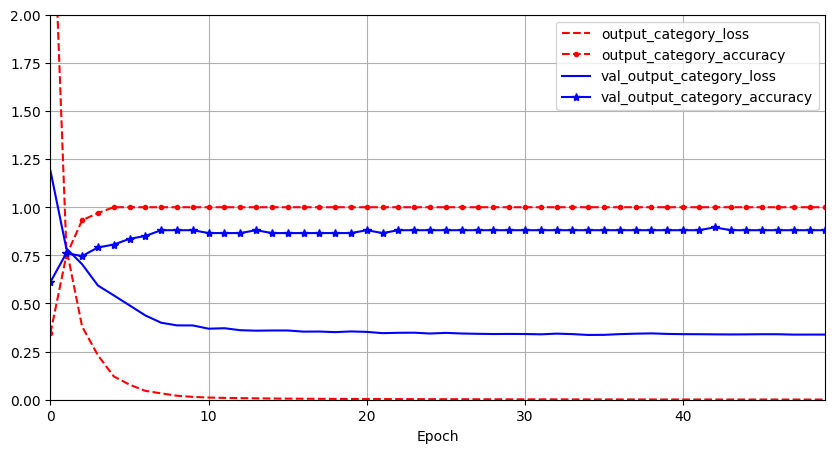

In [9]:
# Plot category loss and accuracy versus epoch
num_epochs = len(history.history['loss'])
df_category.plot(figsize=(10, 5), xlim=[0, num_epochs-1], ylim=[0, 2], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()

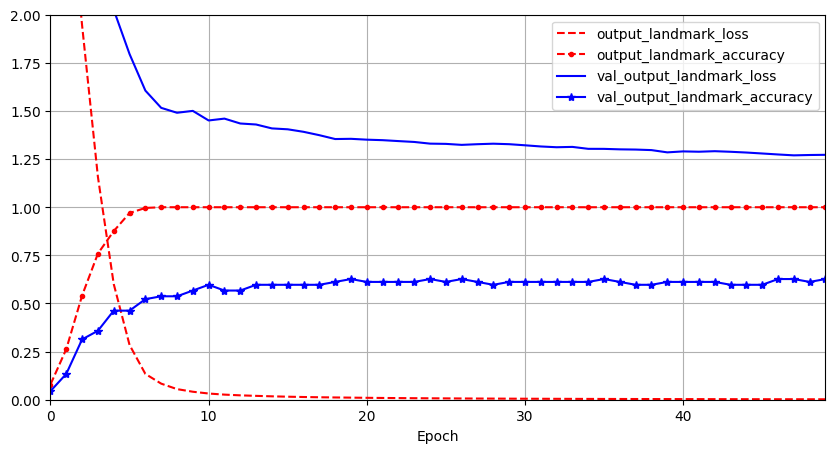

In [10]:
# Plot landmark loss and accuracy versus epoch
num_epochs = len(history.history['loss'])
df_landmark.plot(figsize=(10, 5), xlim=[0, num_epochs-1], ylim=[0, 2], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [11]:
# Evaluate the model on the test set
results = model.evaluate(X_test, [y_test_c, y_test_l])

3/3 [==============================] - 9s 4s/step - loss: 1.3949 - output_category_loss: 0.2771 - output_landmark_loss: 1.1178 - output_category_accuracy: 0.9286 - output_landmark_accuracy: 0.6310


In [12]:
results
# test_loss_c, test_loss_l, test_acc_c, test_acc_l

[1.394931435585022,
 0.27714240550994873,
 1.1177890300750732,
 0.9285714030265808,
 0.6309523582458496]

In [13]:
# Predict the outputs for the test set
y_proba_c, y_proba_l = model.predict(X_test)
y_pred_c = y_proba_c.argmax(axis=-1)
y_pred_l = y_proba_l.argmax(axis=-1)

# Calculate the accuracy, precision, and recall for the test set
def my_metrics(y_test, y_pred, class_names):
    # Calculate the accuracy, precision, and recall for the test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Convert the scores to percentages
    accuracy_pct = accuracy * 100
    precision_pct = precision * 100
    recall_pct = recall * 100
    f1_pct = f1 * 100

    # Print the accuracy, precision, and recall for the test set as percentages
    print("Test Accuracy: {:.2f}%".format(accuracy_pct))
    print("Test Precision: {:.2f}%".format(precision_pct))
    print("Test Recall: {:.2f}%".format(recall_pct))
    print("Test F1 score: {:.2f}%".format(f1_pct))
    
    target_names = [f"Class {i} ({class_names[i]})" for i in range(len(class_names))]
    report = classification_report(y_test, y_pred, target_names=target_names)
    print(report)
    
print("\nCategory Classification:")
my_metrics(y_test_c, y_pred_c, class_names_c)
print("\nLandmark Classification:")
my_metrics(y_test_l, y_pred_l, class_names_l)

3/3 [==============================] - 1s 306ms/step

Category Classification:
Test Accuracy: 92.86%
Test Precision: 94.48%
Test Recall: 93.72%
Test F1 score: 93.96%
                        precision    recall  f1-score   support

      Class 0 (Gothic)       0.88      0.83      0.86        18
      Class 1 (Modern)       1.00      0.94      0.97        16
      Class 2 (Mughal)       1.00      1.00      1.00         8
Class 3 (Neoclassical)       0.92      1.00      0.96        11
     Class 4 (Pagodas)       1.00      0.90      0.95        10
    Class 5 (Pyramids)       0.87      0.95      0.91        21

              accuracy                           0.93        84
             macro avg       0.94      0.94      0.94        84
          weighted avg       0.93      0.93      0.93        84


Landmark Classification:
Test Accuracy: 63.10%
Test Precision: 64.05%
Test Recall: 68.64%
Test F1 score: 63.47%


C:\Users\kanchi\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Number of classes, 29, does not match size of target_names, 30. Try specifying the labels parameter